### 1. Import and Install Dependencies

In [ ]:
#!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

### 2. Keypoints using MP Holistic

In [2]:
# Initialize mediapipe holistic and face_mesh models
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
#mp_face_mesh = mp.solutions.face_mesh  # Add this line to import the face_mesh module

In [3]:
# Function to process image and get mediapipe results
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
    return image, results

In [7]:
#not needed but keep it for my own testing
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks (using FaceMesh for face connections)
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

    # Draw pose landmarks (using Holistic)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))

    # Draw hand landmarks (left hand)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

    # Draw hand landmarks (right hand)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.face_landmarks.landmark)

468

In [11]:
frame

array([[[83, 83, 91],
        [83, 83, 90],
        [83, 84, 88],
        ...,
        [89, 81, 76],
        [90, 80, 76],
        [91, 80, 76]],

       [[82, 82, 88],
        [82, 83, 88],
        [82, 83, 87],
        ...,
        [89, 81, 76],
        [90, 80, 76],
        [90, 80, 76]],

       [[84, 85, 88],
        [84, 86, 88],
        [84, 86, 87],
        ...,
        [88, 81, 76],
        [88, 81, 76],
        [88, 81, 76]],

       ...,

       [[64, 56, 63],
        [64, 56, 63],
        [62, 57, 63],
        ...,
        [48, 28, 27],
        [48, 28, 28],
        [48, 28, 28]],

       [[68, 56, 62],
        [67, 56, 62],
        [66, 58, 63],
        ...,
        [47, 29, 26],
        [48, 29, 26],
        [48, 29, 26]],

       [[70, 56, 62],
        [68, 56, 62],
        [67, 57, 63],
        ...,
        [47, 29, 26],
        [47, 29, 26],
        [48, 29, 26]]], dtype=uint8)

In [12]:
draw_landmarks(frame,results)

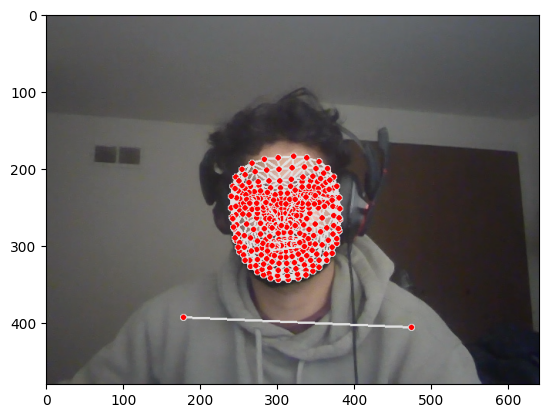

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### 3. Extract Keypoint Values

In [14]:
len(results.pose_landmarks.landmark)

33

In [87]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = (
    np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() 
    if results.pose_landmarks 
    else np.zeros(132)
    )
face = (
    np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)
    )
lh = (
    np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() 
    if results.left_hand_landmarks 
    else np.zeros(21*3)
    )
rh = (
    np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() 
    if results.right_hand_landmarks 
    else np.zeros(21*3)
    )

In [17]:
face

array([ 0.48425072,  0.60995644, -0.02789556, ...,  0.55172521,
        0.48382348,  0.00918763])

In [18]:
def extract_keypoints(results):
    pose = (
        np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() 
        if results.pose_landmarks 
        else np.zeros(33*4)
        )
    face = (
        np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
        if results.face_landmarks 
        else np.zeros(468*3)
        )
    lh = (
        np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() 
        if results.left_hand_landmarks 
        else np.zeros(21*3)
        )
    rh = ( 
        np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() 
        if results.right_hand_landmarks 
        else np.zeros(21*3)
        )
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.47661757,  0.5726192 , -1.22544575, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.47661757,  0.5726192 , -1.22544575, ...,  0.        ,
        0.        ,  0.        ])

### 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'Good game', 'Loser'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect Keypoint Values for Training and Testing

In [29]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [30]:
cap.release()
cv2.destroyAllWindows()

### 6. Preprocess Data and Create Labels and Features

In [71]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [72]:
label_map = {label:num for num, label in enumerate(actions)}

In [73]:
label_map

{'hello': 0, 'Good game': 1, 'Loser': 2}

In [74]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [75]:
np.array(sequences).shape

(90, 30, 1662)

In [76]:
np.array(labels).shape

(90,)

In [77]:
X = np.array(sequences)

In [78]:
X.shape

(90, 30, 1662)

In [79]:
y = to_categorical(labels).astype(int)

In [80]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [82]:
y_test.shape

(5, 3)

### 7. Build and Train LSTM Neural Network

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [84]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [85]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [86]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [70]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 171ms/step - loss: 2.3364 - categorical_accuracy: 0.2235
Epoch 2/2000
3/3 [==============================] - 1s 184ms/step - loss: 6.0964 - categorical_accuracy: 0.2353
Epoch 3/2000
3/3 [==============================] - 1s 190ms/step - loss: 5.1784 - categorical_accuracy: 0.2706
Epoch 4/2000
3/3 [==============================] - 1s 185ms/step - loss: 25.1872 - categorical_accuracy: 0.4471
Epoch 5/2000
3/3 [==============================] - 0s 156ms/step - loss: 8.0142 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 160ms/step - loss: 11.0471 - categorical_accuracy: 0.2824
Epoch 7/2000
3/3 [==============================] - 0s 158ms/step - loss: 17.4804 - categorical_accuracy: 0.3765
Epoch 8/2000
3/3 [==============================] - 1s 187ms/step - loss: 10.7372 - categorical_accuracy: 0.2588
Epoch 9/2000
3/3 [==============================] - 1s 195ms/step - loss: 14.6434 - categorical_accu

KeyboardInterrupt: 

In [ ]:
model.summary()

### 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[1])]

In [ ]:
actions[np.argmax(y_test[1])]

### 9. Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.save('action.h5')

### 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_train)

In [ ]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

### 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()